## 激活函数
全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。

### ReLU函数
ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素x，该函数定义为
$$ReLU(x)=max(x,0)$$

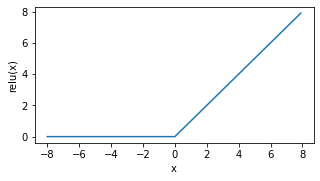

In [18]:
import torch
import numpy as numpy
import matplotlib.pyplot as plt

def xyplot(x_vals,y_vals,name):
    fig,ax=plt.subplots(figsize=(5,2.5))
    ax.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    ax.set_xlabel('x')
    ax.set_ylabel(name+'(x)')

x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=x.relu()
xyplot(x,y,'relu')

### sigmoid函数
sigmoid在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLUctant函数取代。在“循环神经网络”一章中，利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。
$$sigmoid(x)=\frac{1}{1+exp(-x)}$$

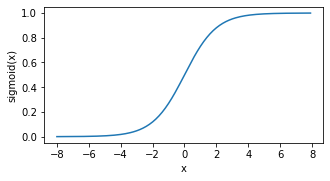

In [19]:
y=x.sigmoid()
xyplot(x,y,'sigmoid')

根据链式法则，sigmoid函数的导数$$sigmoid'(x)=sigmoid(x)(1-sigmoid(x))$$
下面绘制sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0

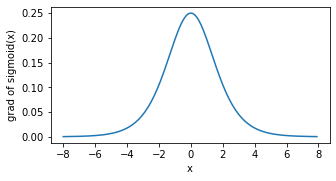

In [23]:
y=x.sigmoid()
x.grad.data.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of sigmoid')

### tanh函数
tanh（双曲正切）函数可以将元素的值变换到-1到1之间：
$$\tanh(x)=\frac{1-exp(-2x)}{1+exp(-2x)}$$
tanh和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

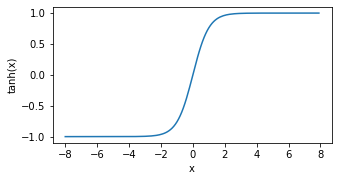

In [21]:
y=x.tanh()
xyplot(x,y,'tanh')

依据练市法则，tanh函数的导数
$$tanh'(x)=1-tanh^2(x)$$
下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0是，tanh函数的导数越接近0

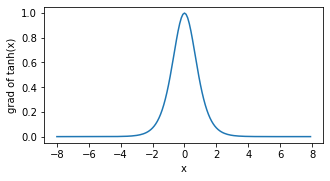

In [26]:
y=x.tanh()
y.sum().backward()
xyplot(x,x.grad,'grad of tanh')